In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

import os
import cv2
import math

1.13.1


# Start

In [2]:
def getWingContours(mask, image):
    filtered_contours = []
    im_cont, contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))
    for i in range(0, len(contours)):
#        image2 = cv2.drawContours(image, [contours[i]], 0, (0,255,0), 5)
#        cv2.imshow('Contours' + str(i), image2)
        if len(contours[i]) < 350:
            print("Too few points " + str(len(contours[i])))
            continue
        (x1 , y1, x2, y2) = getAABBfromContour(contours[i])
        if x2-x1 < 350 or x2-x1 > 600:
            print("Not correct width " + str(x2-x1))
            continue
        filtered_contours.append(contours[i])

    return filtered_contours

In [3]:
def getAABBfromContour(contour):
    min_x = contour[0][0][0]
    max_x = contour[0][0][0]
    min_y = contour[0][0][1]
    max_y = contour[0][0][1]
    for j in range(0,len(contour)):
        if contour[j][0][0] < min_x:
            min_x = contour[j][0][0]
        if contour[j][0][0] > max_x:
            max_x = contour[j][0][0]
        if contour[j][0][1] < min_y:
            min_y = contour[j][0][1]
        if contour[j][0][1] > max_y:
            max_y = contour[j][0][1]
    return (min_x, min_y, max_x, max_y)

In [4]:
def getThresholdMask(image):
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    """
    #Patriks original
    
    # Blur to get rid of noice
    imblur = imgray
    for i in range(0, 10):
        imblur = cv2.GaussianBlur(imblur,(17,17),0)
    ret, mask = cv2.threshold(imblur, 127, 255, 0) 
    """
    #mask = cv2.adaptiveThreshold(imgray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    #mask = cv2.adaptiveThreshold(imgray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
    
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(imgray,(5,5),0)
    ret3, mask = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
#    cv2.imshow('Gray',imgray)
#    cv2.imshow('Blur',imblur)
    height, width = mask.shape
    mask = cv2.rectangle(mask,(0,0),(width-1,height-1),(255,255,255),2)
#    cv2.imshow('Threshold',mask)
    return mask

In [5]:
filepath = os.path.join("C:\\","Homeroot","00Biodling","bee","WingDataFiles","bee","wings")
wingImagePath = os.path.join(filepath,"Images")
wingIndexPath = os.path.join(filepath, "WingIndexFiles")
contourWorkDir = os.path.join(filepath, "contours")

if os.path.exists(contourWorkDir) is False:
    os.mkdir(os.path.join(filepath, 'contours/'))
    print("creating contour directory")




In [6]:
drawGraphs = 0

imageWidth= 500
imageHeight = 200

imageFileName = "aby-acb-1717.jpg"
#imageFileName = "aby-acb-1779.jpg"
#imageFileName = "aby-acb-1806.jpg"
#thresholde = 50
filename = os.path.join(wingImagePath,"ACB",imageFileName)
image =  cv2.imread(filename)
cv2.startWindowThread()
#print(image.shape)



(11124, 1328, 3)


In [7]:
    #image = img_array[0]
    #image = img_array[0]
    hist = cv2.calcHist([image],[0],None,[256],[0,256])
    if (drawGraphs):
        #print("Kill histogram to continue")
        cv2.imshow('Original',image)
        cv2.waitKey(0)
        plt.plot(hist)
        plt.xlim([0,256])
        plt.show()
        cv2.destroyAllWindows()

In [8]:
    mask = getThresholdMask(image)
    if (drawGraphs):
        cv2.imshow('Mask',mask)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [9]:
    wing_contours = getWingContours(mask, image)
    #cv2.imshow('contours',wing_contours)
    print ("Found " + str(len(wing_contours)) + " possible wings")
    for contours in wing_contours:
        (x1 , y1, x2, y2) = getAABBfromContour(contours)
        print(str(x1) + ", " + str(y1) + ", " + str(x2) + ", " + str(y2))
        image = cv2.rectangle(image,(x1,y1),(x2,y2),(255,0,0),5)
    if (drawGraphs):
        cv2.imshow('KKK',image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

10017
Too few points 4
Too few points 7
Too few points 11
Too few points 8
Too few points 8
Too few points 8
Too few points 6
Too few points 4
Too few points 4
Too few points 7
Too few points 9
Too few points 6
Too few points 6
Too few points 6
Too few points 6
Too few points 6
Too few points 6
Too few points 12
Too few points 4
Too few points 8
Too few points 4
Too few points 7
Too few points 10
Too few points 4
Too few points 6
Too few points 7
Too few points 9
Too few points 8
Too few points 6
Too few points 8
Not correct width 1065
Too few points 2
Too few points 6
Too few points 15
Too few points 4
Too few points 25
Too few points 6
Too few points 6
Too few points 45
Too few points 4
Too few points 9
Too few points 4
Too few points 8
Too few points 4
Too few points 6
Too few points 14
Too few points 7
Too few points 4
Too few points 8
Too few points 4
Too few points 6
Too few points 7
Too few points 7
Too few points 7
Too few points 13
Too few points 11
Too few points 18
Too few p

Too few points 13
Too few points 4
Too few points 12
Too few points 8
Too few points 7
Too few points 9
Too few points 7
Too few points 6
Too few points 7
Too few points 6
Too few points 4
Too few points 9
Too few points 4
Too few points 4
Too few points 10
Too few points 11
Too few points 4
Too few points 6
Too few points 8
Too few points 6
Too few points 6
Too few points 6
Too few points 29
Too few points 7
Too few points 8
Too few points 10
Too few points 6
Too few points 6
Too few points 7
Too few points 14
Too few points 8
Too few points 8
Too few points 8
Too few points 9
Too few points 28
Too few points 2
Too few points 4
Too few points 7
Too few points 4
Too few points 24
Too few points 24
Too few points 12
Too few points 4
Too few points 6
Too few points 12
Too few points 6
Too few points 6
Too few points 11
Not correct width 47
Too few points 5
Too few points 2
Too few points 6
Too few points 1
Too few points 6
Too few points 7
Too few points 40
Too few points 40
Too few poin

Too few points 6
Too few points 6
Too few points 21
Too few points 47
Too few points 5
Too few points 9
Too few points 10
Too few points 32
Too few points 5
Too few points 9
Too few points 67
Too few points 6
Too few points 5
Too few points 10
Too few points 16
Too few points 10
Too few points 8
Too few points 21
Too few points 6
Too few points 15
Too few points 9
Too few points 24
Too few points 15
Too few points 17
Too few points 7
Too few points 4
Too few points 8
Too few points 18
Too few points 29
Too few points 50
Too few points 9
Too few points 7
Too few points 6
Too few points 8
Too few points 6
Too few points 8
Too few points 6
Too few points 6
Too few points 4
Too few points 8
Too few points 37
Too few points 16
Too few points 82
Too few points 9
Too few points 7
Too few points 8
Too few points 7
Too few points 8
Too few points 8
Too few points 4
Too few points 8
Too few points 17
Too few points 14
Too few points 7
Too few points 6
Too few points 8
Too few points 18
Too few p

Too few points 1
Too few points 4
Too few points 17
Too few points 28
Too few points 5
Too few points 7
Too few points 7
Too few points 2
Too few points 14
Too few points 4
Too few points 4
Too few points 10
Too few points 1
Too few points 8
Too few points 4
Too few points 2
Too few points 12
Too few points 13
Too few points 2
Too few points 9
Too few points 16
Too few points 7
Too few points 6
Too few points 19
Too few points 7
Too few points 7
Too few points 4
Too few points 8
Too few points 10
Too few points 9
Too few points 13
Too few points 8
Too few points 21
Too few points 8
Too few points 10
Too few points 7
Too few points 9
Too few points 9
Too few points 52
Too few points 16
Too few points 6
Too few points 6
Too few points 36
Too few points 4
Too few points 7
Too few points 6
Too few points 8
Too few points 4
Too few points 17
Too few points 8
Too few points 7
Too few points 6
Too few points 6
Too few points 20
Too few points 4
Too few points 8
Too few points 14
Too few point

Too few points 4
Too few points 6
Too few points 6
Too few points 5
Too few points 4
Too few points 7
Too few points 10
Too few points 8
Too few points 14
Too few points 11
Too few points 6
Too few points 6
Too few points 11
Too few points 4
Too few points 29
Too few points 10
Too few points 9
Too few points 6
Too few points 10
Too few points 4
Too few points 4
Too few points 13
Too few points 9
Too few points 5
Too few points 4
Too few points 6
Too few points 26
Too few points 7
Too few points 6
Too few points 4
Too few points 12
Too few points 8
Too few points 8
Too few points 10
Too few points 33
Too few points 11
Too few points 9
Too few points 4
Too few points 8
Too few points 4
Too few points 6
Too few points 8
Too few points 8
Too few points 4
Too few points 6
Too few points 43
Too few points 9
Too few points 34
Too few points 6
Too few points 7
Too few points 6
Too few points 10
Too few points 6
Too few points 24
Too few points 7
Too few points 4
Too few points 4
Too few points

Too few points 4
Too few points 15
Too few points 6
Too few points 16
Too few points 14
Too few points 7
Too few points 8
Too few points 17
Too few points 8
Too few points 11
Too few points 26
Too few points 6
Too few points 8
Too few points 7
Too few points 4
Too few points 6
Too few points 8
Too few points 8
Too few points 6
Too few points 7
Too few points 7
Too few points 14
Too few points 9
Too few points 4
Too few points 6
Too few points 9
Too few points 6
Too few points 7
Too few points 8
Too few points 28
Too few points 5
Too few points 8
Too few points 4
Too few points 27
Too few points 6
Too few points 4
Too few points 6
Too few points 7
Too few points 5
Too few points 75
Too few points 8
Too few points 8
Too few points 10
Too few points 5
Too few points 6
Too few points 9
Too few points 6
Too few points 15
Too few points 6
Too few points 11
Too few points 9
Too few points 5
Too few points 8
Too few points 6
Too few points 10
Too few points 6
Too few points 5
Too few points 8


Too few points 7
Too few points 7
Too few points 8
Too few points 13
Too few points 6
Too few points 11
Too few points 6
Too few points 4
Too few points 4
Too few points 10
Too few points 8
Too few points 11
Too few points 6
Too few points 6
Too few points 4
Too few points 20
Too few points 8
Too few points 4
Too few points 10
Too few points 13
Too few points 4
Too few points 4
Too few points 6
Too few points 14
Too few points 8
Too few points 26
Too few points 16
Too few points 25
Too few points 4
Too few points 5
Too few points 7
Too few points 6
Too few points 6
Too few points 6
Too few points 9
Too few points 4
Too few points 15
Too few points 9
Too few points 13
Too few points 6
Too few points 10
Too few points 4
Too few points 7
Too few points 6
Too few points 8
Too few points 14
Too few points 9
Too few points 7
Too few points 7
Too few points 4
Too few points 5
Too few points 25
Too few points 6
Too few points 6
Too few points 7
Too few points 10
Too few points 7
Too few points

In [10]:
    print(imageFileName)
    test = os.path.join(contourWorkDir, "cont_" + imageFileName)
    #cv2.imwrite(test + os.path.basename(filename), image)
    cv2.imwrite(test, image)

aby-acb-1717.jpg


True

# Getting points from connected json file

In [11]:
def getAllWingPoints(wingIndex):
    wingPoints = []
    wings = wingIndex["wings"]
    for wingInfo in wings:
        wingPoints.append([(int(wingInfo["x1"]), int(wingInfo["y1"])),
                          (int(wingInfo["x2"]), int(wingInfo["y2"])),
                          (int(wingInfo["x3"]), int(wingInfo["y3"])),
                          (int(wingInfo["x4"]), int(wingInfo["y4"])),
                          (int(wingInfo["x5"]), int(wingInfo["y5"])),
                          (int(wingInfo["x6"]), int(wingInfo["y6"])),
                          (int(wingInfo["x7"]), int(wingInfo["y7"]))
                          ])

    return wingPoints    

In [12]:
def getAllDvCiValues(wingIndex):
    wingDvCi = []
    wings = wingIndex["wings"]
    for wingInfo in wings:
        wingDvCi.append([(wingInfo["Dv"], wingInfo["Ci"])])
    return wingDvCi   

In [13]:
def addAllWingPointsToImage(image, allWingPoints):
    for wingPoints in allWingPoints:
    #print(wingPoints)
        for points in wingPoints:
            #print(points)
            image = cv2.circle(image, points, 2, (0,255,0),-1)
    return image

In [14]:
"""
load json file for image and plot points
"""
import json

prefix="bee-wing-"
(name, ext) = os.path.splitext(imageFileName)
wingIndexName = os.path.join(wingIndexPath, prefix + name + "-x" + ".json")

if wingIndexName:
    print("open json wing index file")
    with open(wingIndexName, 'r') as f:
        wingIndex = json.load(f)
    #print(wingIndex)

open json wing index file


In [15]:
allWingsDvCi = []
allWingsDvCi = getAllDvCiValues(wingIndex)
allWingsDvCi[0]

[(-0.798, 1.279)]

In [16]:
allWingPoints = []
allWingPoints = getAllWingPoints(wingIndex)
#print(allWingPoints)
allWingPoints[0][0]

(344, 862)

In [17]:
image2 = addAllWingPointsToImage(image, allWingPoints)
if (drawGraphs):
    cv2.imshow('KKK',image2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [18]:
print(imageFileName)
test = os.path.join(contourWorkDir, "points_" + imageFileName)
#cv2.imwrite(test + os.path.basename(filename), image)
cv2.imwrite(test, image2)
    

aby-acb-1717.jpg


True

Correct and wash countour if matching index file exist.

Check for missing info in index file if wing does not exist remove the contour to be used for training data.

Check contour size if it is bigger then wanted Height 
Check contour if it contain 1 or more wing indexes
If 1 then try to rotate wing to fit wanted contour size use X1,y1 to x2,y2 vector and rotate same degrees.
If 2 or more try to split the picture

In [19]:
def getWingContourBoxes(wingContours):
    wingContourBoxes = []
    for contours in wingContours:
        (x1 , y1, x2, y2) = getAABBfromContour(contours)
        wingContourBoxes.append([x1, y1, x2, y2])
    wingContourBoxes.sort(key=lambda x: x[1])
    return wingContourBoxes
    


In [20]:
def checkContoursAgainstWingIndex(wingContourBoxes, allWingPoints):
    
    snipBoxes = []
    #for contours in wing_contours:
    for box in wingContourBoxes:
        overSizeHeight = 0
        occureInImage = 0
        x1 = box[0]
        y1 = box[1]
        x2 = box[2]
        y2 = box[3]
        y1y2 = y2-y1
        
        for point in allWingPoints:
            #print(point[0][0])
            if (x1 < point[0][0] < x2 and y1 < point[0][1] < y2):
                occureInImage = occureInImage + 1
        if occureInImage == 1:
            snipBoxes.append([x1, y1, x2, y2])
        elif occureInImage > 1:
            yDivider = int(y1y2/occureInImage)
            yStart = y1
            yStop = y2
            #print("occure: " + str(occureInImage) + " y1y2: " + str(y1y2) + " divider: " + str(yDivider))
            for i in range  (0, occureInImage):
                yStop = yStart + yDivider
                snipBoxes.append([x1, yStart, x2, yStop])
                yStart = yStart+ yDivider
            
        #print("indInBox: " + str(occureInImage))
        #print(len(snipBoxes))
        #Rearrange the list for falling order of y1
    snipBoxes.sort(key=lambda x: x[1])
    return snipBoxes

In [21]:
#wingContourBoxes = []
wingContourBoxes = getWingContourBoxes(wing_contours)
wingContourBoxes[1]

[37, 834, 553, 996]

In [22]:
snipBoxes = checkContoursAgainstWingIndex(wingContourBoxes, allWingPoints)
snipBoxes[0]

[37, 834, 553, 996]

In [23]:
#should be used on boxes where duplicate wings are split
def findOversizedHeightBox(wingBoxes, allWingPoints, imageHeight):
    i=0
    overSizedImageList = []
    for box in wingBoxes:
        overSizeHeight = 0
        occureInImage = 0
        x1 = box[0]
        y1 = box[1]
        x2 = box[2]
        y2 = box[3]
        y1y2 = y2-y1
        if imageHeight <= y1y2:
            overSizeHeight = 1
            
        for point in allWingPoints:
            if (x1 < point[0][0] < x2 and y1 < point[0][1] < y2):
                occureInImage = occureInImage + 1
        
        if overSizeHeight == 1 and occureInImage == 1:
            #print("Oversize height contour found in box: " + str(i))
            overSizedImageList.append(i)
            
        i=i + 1
    return overSizedImageList

In [24]:
def rotateImage(image, angle, imageNumber):

    histRoi = cv2.calcHist([image],[0],None,[256],[0,256])
    histRoiMax = int(histRoi.argmax(axis=0)) # getting the color with most values in image so that rotation can set background color
    print("histogram ROI max: " + str(histRoiMax))
    plt.figure()
    plt.title("Image histogram")
    plt.plot(histRoi)
    #histRoiMax = 147
    
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    #result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR, borderValue=(255, 255, 255))
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR, borderValue=(histRoiMax, histRoiMax, histRoiMax))
    return result

In [25]:
def rotateAndResizeFromWingIndex(img, snipBoxes, overSizedImageList, allWingPoints, imageHeight):
    for overSizeimage in overSizedImageList:
        print("Image index: " + str(overSizeimage))
        x1 = snipBoxes[overSizeimage][0]
        y1 = snipBoxes[overSizeimage][1]
        x2 = snipBoxes[overSizeimage][2]
        y2 = snipBoxes[overSizeimage][3]
        x1x2 = x2-x1
        y1y2 = y2-y1

        roi = img[y1:y2, x1:x2]
        roi = img[y1-50:y2+50, x1-50:x2+50] #Adjusted size, needs to be checked. Can be a fault when trying to crop to wanted size  

        angle = 0;
        for point in allWingPoints:
            #print(point[0][0])
            if (x1 < point[0][0] < x2 and y1 < point[0][1] < y2):
                p1 = point[0]
                p2 = point[1]

                myradians = math.atan2(p2[1]-p1[1], p2[0]-p1[0])    
                mydegrees = math.degrees(myradians)
                #print("Radian: " + str(myradians))
                #print(mydegrees)

        roiRotate = rotateImage(roi, mydegrees, overSizeimage)
        roiRotateBox = roiRotate.copy()

        roiMask = getThresholdMask(roiRotate)

        roi_wing_contours = getWingContours(roiMask, roiRotate)
        print ("Found " + str(len(wing_contours)) + " possible wings")
        for contours in roi_wing_contours:
            (x1 , y1, x2, y2) = getAABBfromContour(contours)
            print(str(x1) + ", " + str(y1) + ", " + str(x2) + ", " + str(y2))

            cv2.rectangle(roiRotateBox,(x1,y1),(x2,y2),(0,255,0),5)

            xCenter = round(x1 + (x2-x1)/2)
            yCenter = round(y1 + (y2-y1)/2)
            newX1 = int(xCenter - imageWidth/2)
            newX2 = int(xCenter + imageWidth/2)
            newY1 = int(yCenter - imageHeight/2)
            newY2 = int(yCenter + imageHeight/2)
            roiRotateCrop = roiRotate[newY1:newY2, newX1:newX2]

        plt.figure(overSizeimage)
        plt.title("Images")
        plt.subplot(2,3,1), plt.imshow(roi), plt.title("Org image")
        plt.subplot(2,3,2), plt.imshow(roiRotate), plt.title("Rotated image")
        plt.subplot(2,3,3), plt.imshow(roiMask), plt.title("Mask")
        plt.subplot(2,3,4), plt.imshow(roiRotateBox), plt.title("Rotated + box")
        plt.subplot(2,3,5), plt.imshow(roiRotateCrop), plt.title("Wanted image size")

In [26]:
"""
Create a list of boxes that are higher then the wanted image size. 
Checks against wing Index file
"""

#overSizedImageList = findOversizedHeightBox(wingContourBoxes, allWingPoints, imageHeight)
overSizedImageList = findOversizedHeightBox(snipBoxes, allWingPoints, imageHeight)
print("Image list index oversized height " + str(overSizedImageList))

Image list index oversized height [4, 8, 15, 22]


Image index: 4
histogram ROI max: 147
75
Too few points 4
Too few points 6
Too few points 7
Too few points 8
Too few points 41
Too few points 8
Too few points 10
Too few points 8
Too few points 18
Too few points 6
Too few points 14
Too few points 167
Too few points 15
Too few points 21
Too few points 35
Too few points 4
Too few points 31
Too few points 4
Too few points 6
Too few points 16
Too few points 4
Too few points 8
Too few points 7
Too few points 16
Too few points 7
Too few points 6
Too few points 9
Too few points 8
Too few points 12
Too few points 6
Too few points 6
Too few points 7
Too few points 14
Too few points 62
Too few points 32
Too few points 8
Too few points 32
Too few points 28
Too few points 8
Too few points 11
Too few points 39
Too few points 19
Too few points 7
Too few points 16
Too few points 4
Too few points 2
Too few points 5
Too few points 9
Too few points 15
Too few points 14
Too few points 5
Too few points 3
Too few points 22
Too few points 11
Too few points 

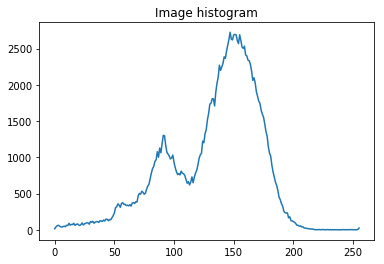

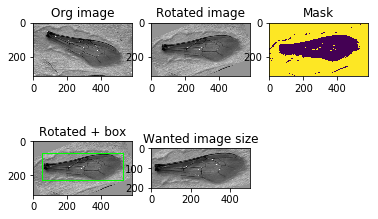

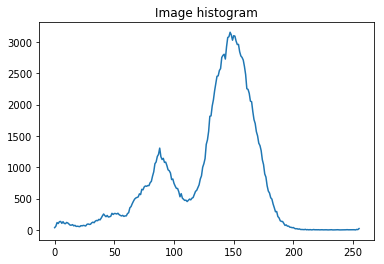

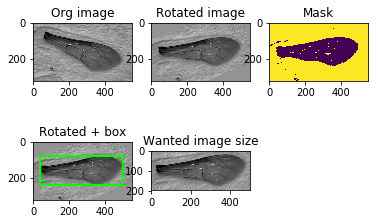

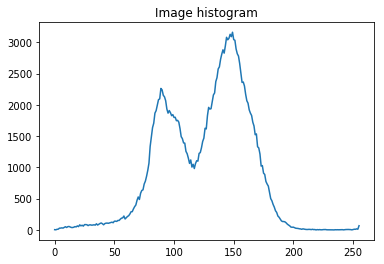

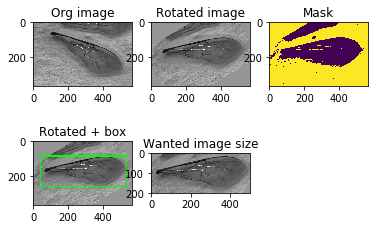

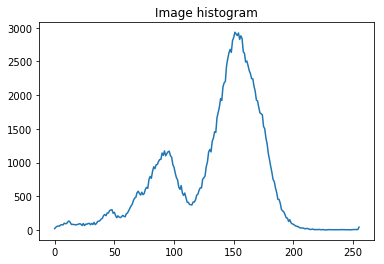

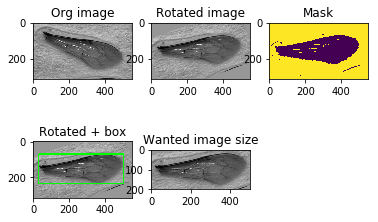

In [27]:
"""
Rotate and resize images based on info from wing index file
"""
image2 =  cv2.imread(filename)

rotateAndResizeFromWingIndex(image2, snipBoxes, overSizedImageList, allWingPoints, imageHeight)

HERE SHOULD BE SOME CODE TO REORDER BOXES SO THAT THEY SORT IN ORDER IN PICTURE IN FALLING Y CORDINAE
HERE SHOULD BE SOME CODE TO REORDER INDEXLIST AS WELL SO THAT THEY ARE SORTED IN FALLING Y CORDINATE

In [28]:
#allWingPoints.sort(key= lambda x: x[0][1])

#allWingPoints

In [29]:
    """
    Attempt to normalize all images to the same size
    
    """
    prefix="bee-wing-"
    
    font        = cv2.FONT_HERSHEY_SIMPLEX
    #textStart  = (10,500)
    fontScale   = 1
    color   = (0,0,255)
    lineType    = 2  
    
    i=0
    for box in snipBoxes:
        i = i+1
        #(x1 , y1, x2, y2) = getAABBfromContour(contours)
        x1 = box[0]
        y1 = box[1]
        x2 = box[2]
        y2 = box[3]
        xLength = x2-x1
        xCenter = round(x1 + (x2-x1)/2)
        yWidth = y2-y1
        yCenter = round(y1 + (y2-y1)/2, 0)
        newX1 = int(xCenter - imageWidth/2)
        newX2 = int(xCenter + imageWidth/2)
        newY1 = int(yCenter - imageHeight/2)
        newY2 = int(yCenter + imageHeight/2)
        #print("Width: " + str(xLength) + ", " "Height: "+ str(yWidth))
        #print("xCenter: " + str(xCenter) + ", " + "yCenter: " + str(yCenter))
        image = cv2.rectangle(image,(newX1,newY1),(newX2,newY2),color,2)
        #tok = os.path.basename(filename)
        #(name, ext) = os.path.splitext(tok)
        (name, ext) = os.path.splitext(imageFileName)
        #print(name)
        textToAdd = prefix + name + '-' + str(i) + ext
        textStart = (newX1, newY1)
        cv2.putText(image, textToAdd, textStart, 
            font, fontScale, color, lineType)

In [30]:
    print(imageFileName)
    test = os.path.join(contourWorkDir, "newCont_" + imageFileName)
    #cv2.imwrite(test + os.path.basename(filename), image)
    cv2.imwrite(test, image)

aby-acb-1717.jpg


True